In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
file_path = "/content/drive/MyDrive/netflix_titles.csv"

In [4]:
df = pd.read_csv(file_path)
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')

print(df.shape)
print(df.head())

(8807, 12)
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

  date_added  release_year rating   duration  \
0 2021-09-25          2020  PG-13     90 min   
1 2021-09-24          2021  TV-MA  2 Seasons   
2 2021-09-24          2021  TV-MA   1 Season 

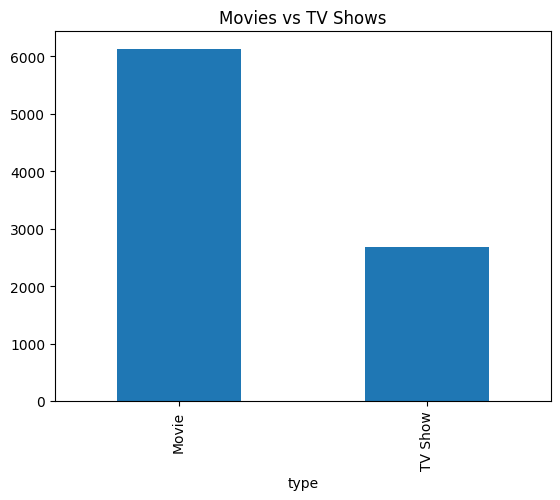

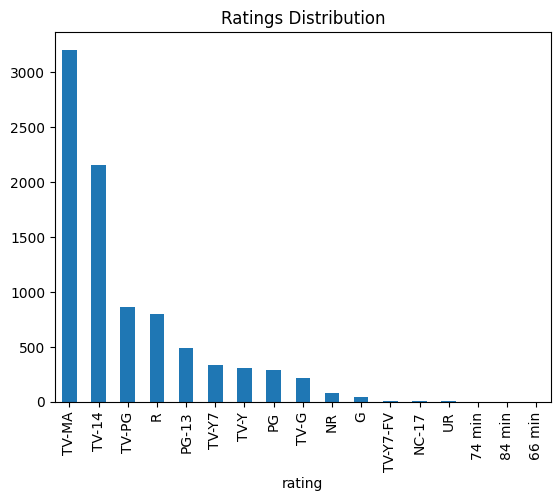

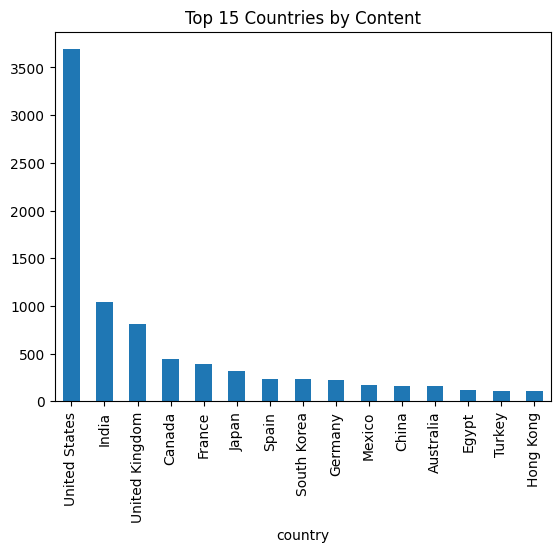

In [5]:
df['type'].value_counts().plot(kind='bar', title="Movies vs TV Shows")
plt.show()
df['rating'].value_counts().plot(kind='bar', title="Ratings Distribution")
plt.show()
countries = df['country'].dropna().str.split(',').explode().str.strip()
top_countries = countries.value_counts().head(15)
top_countries.plot(kind='bar', title="Top 15 Countries by Content")
plt.show()

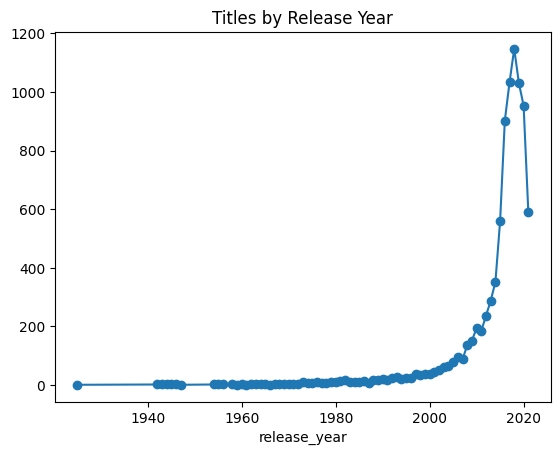

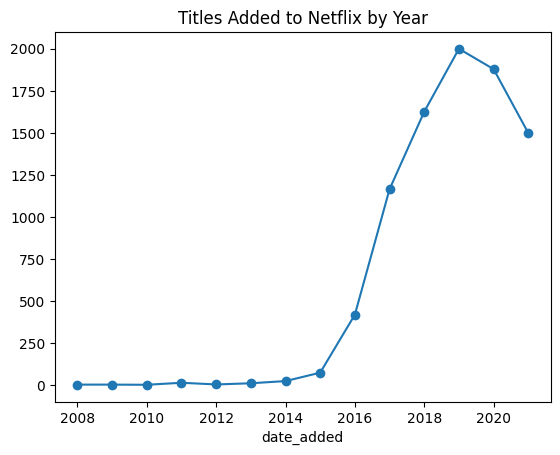

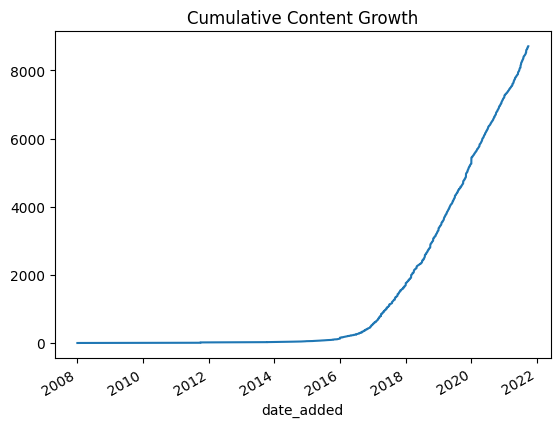

In [6]:
df['release_year'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title("Titles by Release Year")
plt.show()
df['date_added'].dt.year.value_counts().sort_index().plot(kind='line', marker='o')
plt.title("Titles Added to Netflix by Year")
plt.show()
added_daily = df.sort_values('date_added')['date_added'].dropna()
growth = pd.Series(1, index=added_daily).cumsum()
growth.plot(title="Cumulative Content Growth")
plt.show()

/tmp/ipython-input-3956297429.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['minutes'] = movies['duration'].str.extract(r'(\d+)').astype(float)


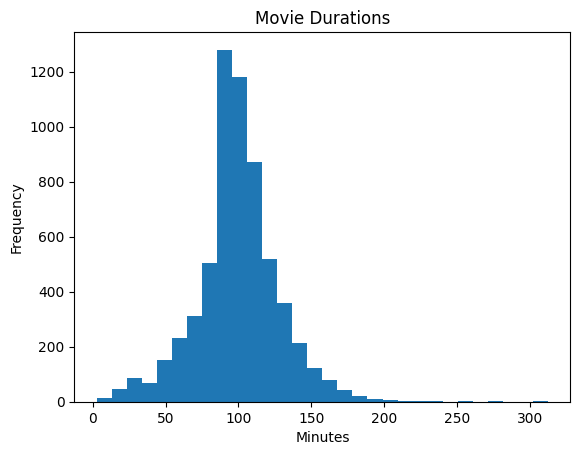

/tmp/ipython-input-3956297429.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shows['seasons'] = shows['duration'].str.extract(r'(\d+)').astype(float)


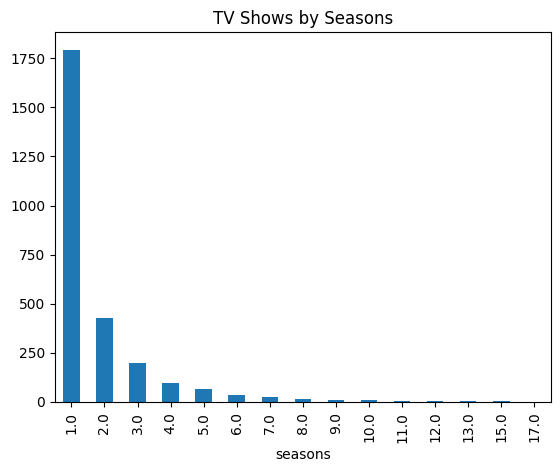

In [7]:
movies = df[df['type']=="Movie"]
movies['minutes'] = movies['duration'].str.extract(r'(\d+)').astype(float)
movies['minutes'].dropna().plot(kind='hist', bins=30, title="Movie Durations")
plt.xlabel("Minutes")
plt.show()
shows = df[df['type']=="TV Show"]
shows['seasons'] = shows['duration'].str.extract(r'(\d+)').astype(float)
shows['seasons'].value_counts().sort_index().plot(kind='bar', title="TV Shows by Seasons")
plt.show()

In [8]:
pairs = df[['director', 'cast']].dropna()
pairs = pairs.assign(cast=pairs['cast'].str.split(',')).explode('cast')
pairs['cast'] = pairs['cast'].str.strip()
pairs['director'] = pairs['director'].str.strip()

collab = pairs.groupby(['director','cast']).size().reset_index(name='count')
top_collab = collab.sort_values('count', ascending=False).head(10)
print(top_collab)

             director                cast  count
31530   Rajiv Chilaka         Rajesh Kava     17
31523   Rajiv Chilaka      Jigna Bhardwaj     17
31524   Rajiv Chilaka       Julie Tejwani     17
31531   Rajiv Chilaka        Rupa Bhimani     16
31534   Rajiv Chilaka        Vatsal Dubey     15
31533   Rajiv Chilaka             Swapnil     12
31527   Rajiv Chilaka              Mousam     12
38526     Suhas Kadav  Saurav Chakraborty      8
34562  S.S. Rajamouli             Prabhas      7
34561  S.S. Rajamouli              Nassar      7


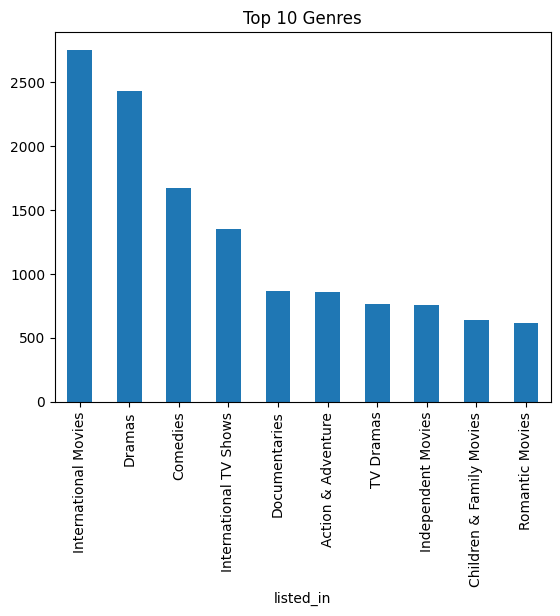

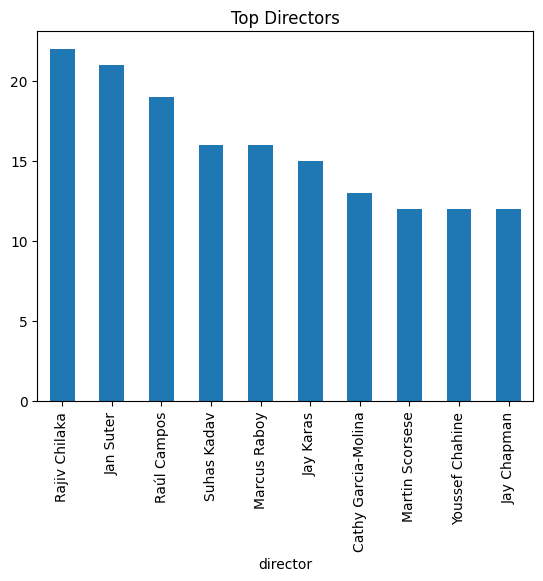

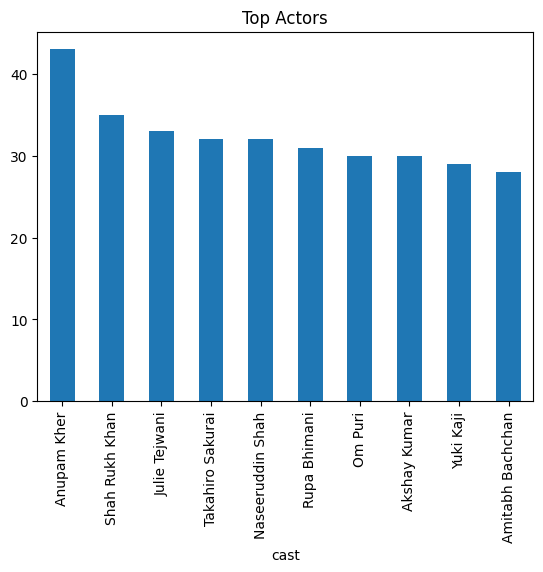

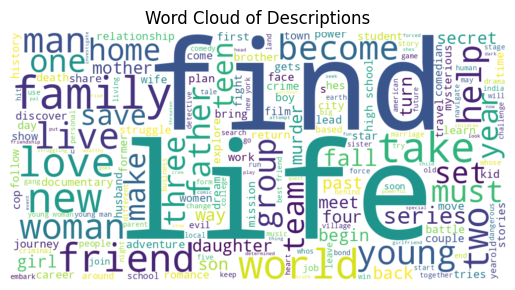

In [9]:
genres = df['listed_in'].dropna().str.split(',').explode().str.strip()
genres.value_counts().head(10).plot(kind='bar', title="Top 10 Genres")
plt.show()
directors = df['director'].dropna().str.split(',').explode().str.strip()
directors.value_counts().head(10).plot(kind='bar', title="Top Directors")
plt.show()
actors = df['cast'].dropna().str.split(',').explode().str.strip()
actors.value_counts().head(10).plot(kind='bar', title="Top Actors")
plt.show()
descriptions = df['description'].dropna().str.lower().str.replace(r'[^a-z\s]', '', regex=True)
text = " ".join(descriptions.tolist())
wc = WordCloud(width=1000, height=500, background_color="white").generate(text)

plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Descriptions")
plt.show()

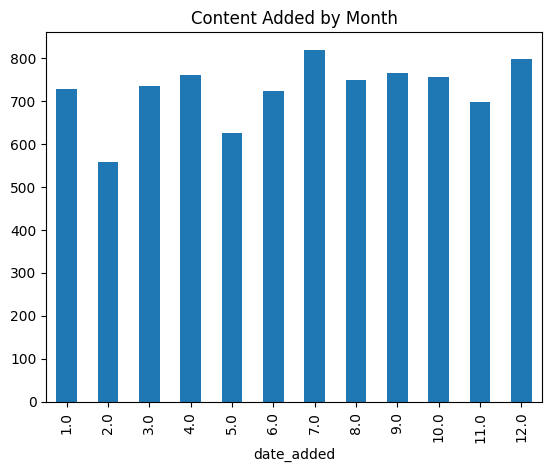

In [10]:
df['date_added'].dt.month.value_counts().sort_index().plot(kind='bar', title="Content Added by Month")
plt.show()

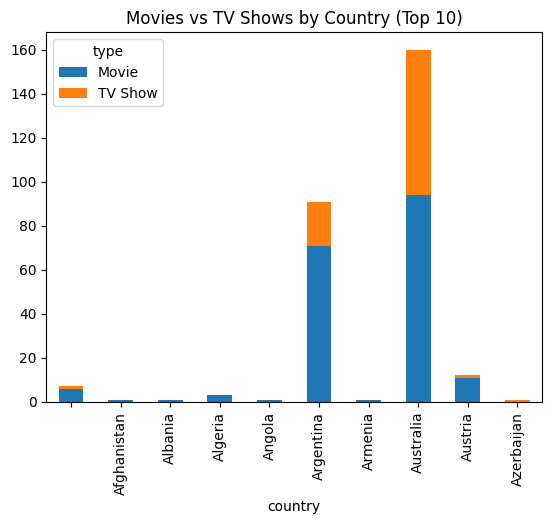

In [11]:
tmp = df[['country','type']].dropna()
tmp = tmp.assign(country=tmp['country'].str.split(',')).explode('country')
tmp['country'] = tmp['country'].str.strip()
ct = tmp.groupby(['country','type']).size().unstack(fill_value=0).head(10)
ct.plot(kind='bar', stacked=True, title="Movies vs TV Shows by Country (Top 10)")
plt.show()

In [12]:
print(df.groupby('type')['rating'].apply(lambda x: x.value_counts().idxmax()))

type
Movie      TV-MA
TV Show    TV-MA
Name: rating, dtype: object


In [13]:
oldest = df.loc[df['release_year']==df['release_year'].min(), 'title']
newest = df.loc[df['release_year']==df['release_year'].max(), 'title']

print("Oldest Year:", df['release_year'].min(), "\nSample Oldest Titles:\n", oldest.head())
print("\nNewest Year:", df['release_year'].max(), "\nSample Newest Titles:\n", newest.head())

Oldest Year: 1925 
Sample Oldest Titles:
 4250    Pioneers: First Women Filmmakers*
Name: title, dtype: object

Newest Year: 2021 
Sample Newest Titles:
 1            Blood & Water
2                Ganglands
3    Jailbirds New Orleans
4             Kota Factory
5            Midnight Mass
Name: title, dtype: object


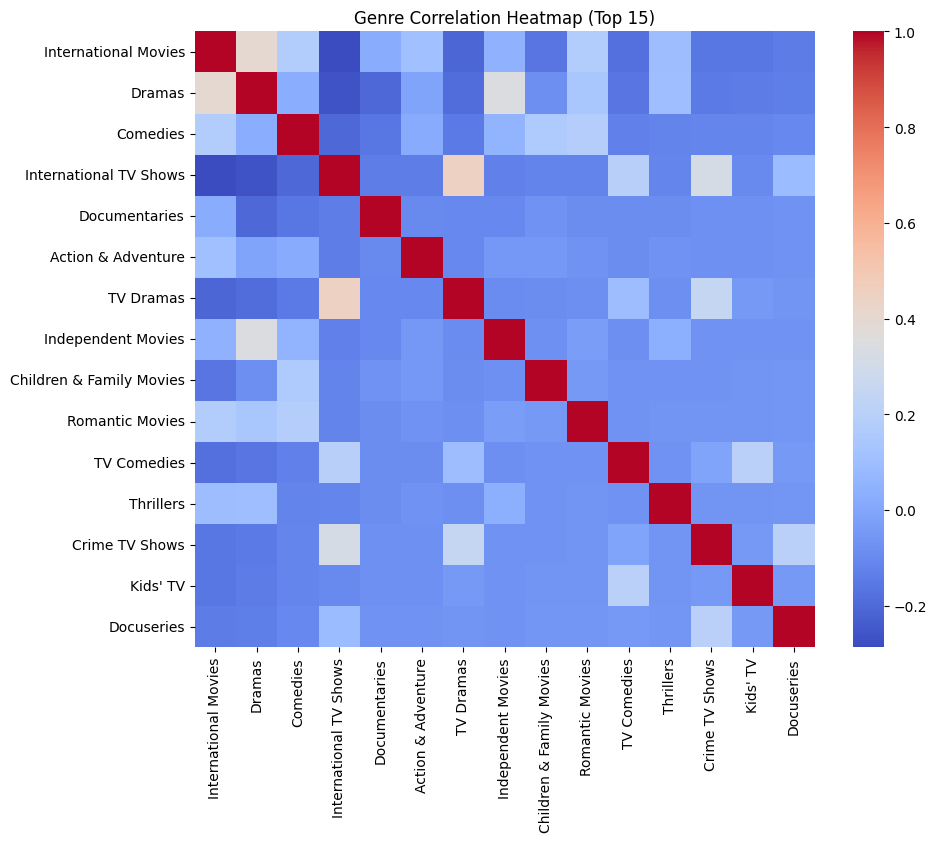

In [14]:
import seaborn as sns

genre_dummies = df['listed_in'].fillna('').str.get_dummies(sep=', ')
top_genres = genre_dummies.sum().sort_values(ascending=False).head(15).index
corr = genre_dummies[top_genres].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=False, cmap="coolwarm")
plt.title("Genre Correlation Heatmap (Top 15)")
plt.show()